## Decision Tree Regression

### Dataset context

You have an HR department in your company and you're hiring people for some open positions.
Once you've interviewed a candidate, you can give her/his an offer and then ask the question about the expected salary.
So, you need to use the available data about positions and levels to validate what the candidate coud be asking for his/her salary.

In [1]:
DATASET_PATH = "../../../../datasets/ml_az_course/004_position_salaries.csv"

### Importing the libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Importing the dataset

In [3]:
dataset = pd.read_csv(DATASET_PATH)
x = dataset.iloc[:, 1:-1].values # we don't use first column "Position"
y = dataset.iloc[:, -1].values # 1D-array

dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


### Training the Decision Tree Regression model on the whole dataset

In [4]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
regressor = RandomForestRegressor(n_estimators=10, random_state=42)

regressor.fit(X=x, y=y)

RandomForestRegressor(n_estimators=10, random_state=42)

### Predicting a new result

In [12]:
preds = regressor.predict(X=[[6.5]])
preds

array([180000.])

It's not so good, that's because Decision Tree Regression algorithm works better with more than one feature.

### Visualising the Decision Tree Regression results (higher resolution)

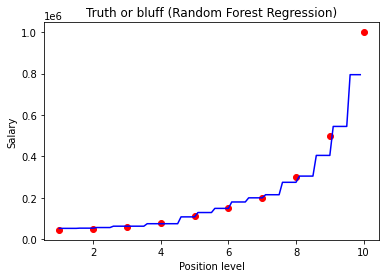

In [13]:
x_grid = np.arange(start=min(x), stop=max(x), step=0.1)

x_grid = x_grid.reshape((len(x_grid), 1))

plt.scatter(x=x, y=y, color="red")
y_preds = regressor.predict(x_grid).reshape(-1, 1)
plt.plot(x_grid, y_preds, color="blue")
plt.title("Truth or bluff (Random Forest Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()